In [ ]:
# Least Absolute Deviation (LAD):

In [ ]:
# statsmodels 라이브러리를 사용하는 것입니다. 
# statsmodels의 quantile_regression 모듈을 사용하면 됩니다. 다음은 LAD 회귀를 구현하는 간단한 예제입니다:

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.5503
Model:                       QuantReg   Bandwidth:                       1.103
Method:                 Least Squares   Sparsity:                        3.036
Date:                Mon, 18 Mar 2024   No. Observations:                  100
Time:                        14:27:14   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0158      0.152      6.680      0.000       0.714       1.318
x1             2.3174      0.151     15.386      0.000       2.019       2.616


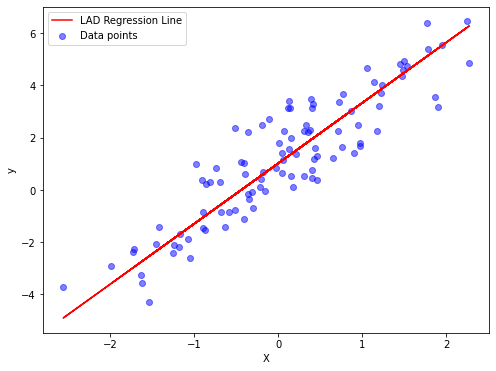

In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 임의의 데이터 생성
np.random.seed(0)
X = np.random.normal(size=100)
y = 2 * X + 1 + np.random.normal(size=100)

# LAD 회귀를 위해 X에 상수항 추가
X = sm.add_constant(X)    
model = sm.QuantReg(y, X) # sm.QuantReg를 사용하여 LAD 회귀 모델을 정의

# 중앙값(quantile=0.5)을 사용하여 LAD 회귀 수행
# fit 메소드를 사용하여 모델을 데이터에 적합시킨다. 
# 여기서 q=0.5는 중앙값에 해당하는 분위수 회귀를 의미하며, 이는 LAD 회귀와 동일합니다.
res = model.fit(q=0.5)

print(res.summary())

# 회귀선 그리기
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 1], y, color='blue', alpha=0.5, label='Data points')
y_pred = res.predict(X)
ax.plot(X[:, 1], y_pred, color='red', label='LAD Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [3]:
## RANSAC (Random Sample Consensus)

In [ ]:
# RANSAC (Random Sample Consensus)은 이상치에 강건한 회귀 모델을 구축하기 위한 알고리즘 
# 이 방법은 데이터의 무작위 서브셋을 사용하여 여러 모델을 반복적으로 추정하고, 가장 많은 데이터 포인트에 적합한 모델을 최종 모델로 선택합니다.
# Python에서는 scikit-learn 라이브러리의 linear_model.RANSACRegressor 클래스를 사용하여 RANSAC 회귀를 구현할 수 있습니다.

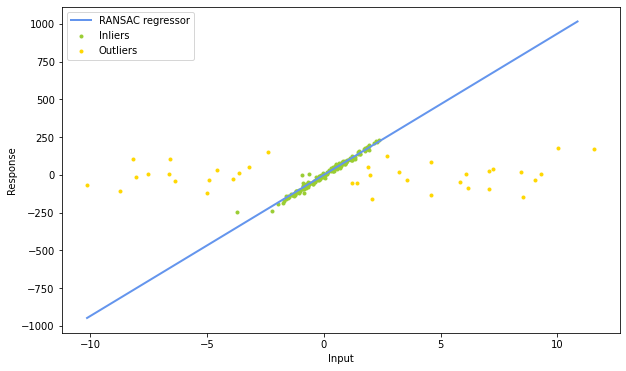

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression

# 임의의 회귀 데이터 생성
X, y, coef = make_regression(n_samples=200, n_features=1, noise=10, coef=True, random_state=0)

# 데이터에 일부러 이상치 추가를 통해 강건성 시험
np.random.seed(1)
X[::5] += 20 * (0.5 - np.random.rand(X[::5].shape[0], 1))
y[::5] += 30 * (0.5 - np.random.rand(X[::5].shape[0]))

# RANSAC 회귀 모델 생성 및 적합
# RANSACRegressor를 사용하여 모델을 데이터에 적합시키고, 이상치와 정상치(inliers)를 구분합니다.

ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# 예측
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

# 결과 시각화
# 원본 데이터 포인트와 RANSAC 회귀선을 시각화하여 결과를 보여줍니다.

plt.figure(figsize=(10, 6))
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2, label='RANSAC regressor')
plt.legend()
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()
